# Computer vision library for computer vision

from pyexpat import model


* `torchvision`
* `torchvision.datasets` - Get datasets and data loading functions for computer visions
* `torchvision.models` - Get pretrained computer vision modelsthat you can levarage for your own problems
* `torchvision.transfomrs` - functions for manipulating your vision data (images) to be suited for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over dataset

In [62]:
# import PyTorch
import torch
from torch import nn

# import torchvision
import torchvision 
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt


#Check verison
print(torch.__version__)
print(torchvision.__version__)


1.11.0+cu113
0.12.0+cu113


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets


In [63]:
# Setup the training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
                                    root = "data", # Where to download data to?
                                    train = True, # do we want the training dataset?
                                    download = True, # do we want to download yes/no
                                    transform = torchvision.transforms.ToTensor(), # How do we want to transfrom the data?
                                    target_transform = None  # How do we want to tranform the labels/targets?
        
)

test_data = datasets.FashionMNIST(
                                root = "data",
                                train = False,
                                download = True,
                                transform = ToTensor(),
                                target_transform=None
)

In [64]:
len(train_data), len(test_data)

(60000, 10000)

In [65]:
# See the first training example 
image, label  = train_data[0]

In [66]:
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [67]:
class_names = train_data.classes
class_names


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [68]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [69]:
image.shape, class_names[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

Image shape: torch.Size([1, 28, 28])


<function matplotlib.pyplot.show(close=None, block=None)>

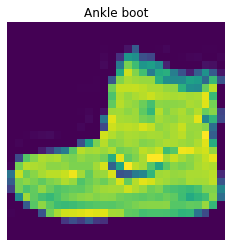

In [70]:
# Visualize our images
from cgitb import grey


image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # matplotlib demands the image dimension to be [height, width, color channel] instead of [color channel, height, width] which is by default done by the PyTorch
plt.title(class_names[label])
plt.axis(False)
plt.show

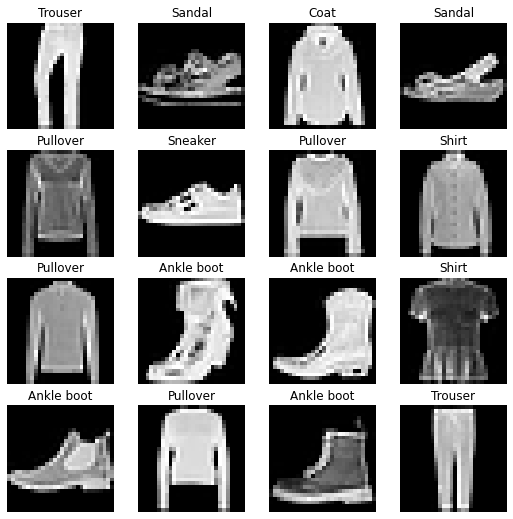

In [71]:
fig = plt.figure(figsize = (9,9))
rows, cols = 4,4 
for i in range (1, rows * cols+1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows,cols, i)
    plt.imshow(img.squeeze(), cmap = "gray")
    plt.title(class_names[label])
    plt.axis(False)

Do you think these items if clothing (images) could be modelled with pure linear lines or do you think we'll need non -linearities?

## 2. Prepare DataLoader

Right now our dataset is in the from of PyTorch Datasets.

DataLoaders turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches or (mini-batches)

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 6000 Images in one hit. So we break it down to 32 images at a tine (batch size of 32).

2. It gives our neural network more chances to update its gradients per epoch.


In [72]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn dataset into iterables
train_dataloader = DataLoader(dataset = train_data,
                             batch_size= BATCH_SIZE,
                             shuffle = True)

test_dataloader  = DataLoader(dataset = test_data,
                              batch_size = BATCH_SIZE,
                              shuffle = False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1b68b8352b0>,
 <torch.utils.data.dataloader.DataLoader at 0x1b68b835310>)

In [73]:
# Let's check out what we have created 
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"length of train_ dataloader:{len(train_dataloader)} Batches of {BATCH_SIZE}")
print(f"length of test_dataloader: {len(test_dataloader)}  batches of {BATCH_SIZE}")


DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001B68B8352B0>, <torch.utils.data.dataloader.DataLoader object at 0x000001B68B835310>)
length of train_ dataloader:1875 Batches of 32
length of test_dataloader: 313  batches of 32


In [74]:
# Check out whats inside the training dataloader

train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape



(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 7, Label size: torch.Size([])


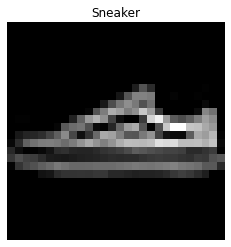

In [75]:
# Show a sample 
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size =[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap ="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, Label size: {label.shape}")

## 3. Model:0 Build a baseline model 

When starting to build a series of machine learning modelling experiments, it's best practice to start with baseline model.

A baseline model is a simple model you will try to improve upon with subsequent models/experiments.

In other words: start simple and add complexity when necessary

In [76]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample 
x = train_features_batch[0]

# Flatten the sample 
output = flatten_model(x) # perform forward pass

# print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"shape after flattening: {output.shape}")


Shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [77]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, Input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= Input_shape, out_features= hidden_units),
            nn.Linear(in_features= hidden_units, out_features= output_shape) 
        )

    def forward(self, x):
        return self.layer_stack(x)

In [78]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
                            Input_shape= 784,  #28*28
                            hidden_units= 10,
                            output_shape= len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be nn.CrossEntropyLoss()

* Optimizer - our optimizer torch.optim.SGD() (stochastic gradient descent)

* Evaluation metric - since we're working on a classification problem, let's use accruacy as our evaluation metric

In [79]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download...


In [80]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Create a function to time our experiments 

Machine Learning is very experimental.

Two of the main things you'll often want to track are:

1. Model's performance (loss and accuracy values etc)
2. How fast it runs
 

In [126]:
from timeit import default_timer as timer
def print_train_time(start: float, end : float, device: torch.device = None):
    """ Prints  difference between start and end time."""
    total_time = (end - start)
    print(f"Train Time on {device}: {total_time:.3f} seconds")
    return total_time

In [82]:
start_time = timer()
end_time = timer()

print_train_time(start = start_time, end = end_time, device = "cpu")



Train Time on cpu: 0.000 seconds


3.3399999665562063e-05

### 3.3 Creating a training loop and training a model on batches of data


1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print out what's happening.
5. Time it all (for fun).


Note: Because we are computing on batches, the optimizer will update the model's parameters once per batch rather than once per epoch.

In [83]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the no of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)): # for tqdm to work wrap your iterator in tqdm
    print(f"Epoch: {epoch}\n------")
    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate the train loss

        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. optimizer step 
        optimizer.step()

        # print out what's happening
        if batch % 400 == 0:
            print(f"Looked at{batch *len(X)}/{len(train_dataloader.dataset)} samples.")

# Divide total train loss by length of train dataloader
train_loss /= len(train_dataloader)

### Testing
test_loss, test_acc = 0, 0
model_0.eval()
with torch.no_grad(): 
    for X_test, y_test in test_dataloader:
        # 1. Forward pass
        test_pred = model_0(X_test)

        # 2. Calculate loss (accumulatively)
        test_loss += loss_fn(test_pred, y_test)

        # 3. Calculate accuracy
        test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

# Calculate the test loss average per batch
test_loss /= len(test_dataloader)

# Calculate the test acc average per batch
test_acc /= len(test_dataloader)

# Print out what's happening
print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                        end=train_time_end_on_cpu,
                                        device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.


 33%|███▎      | 1/3 [00:07<00:15,  7.65s/it]

Epoch: 1
------
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.


 67%|██████▋   | 2/3 [00:15<00:07,  7.55s/it]

Epoch: 2
------
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.


100%|██████████| 3/3 [00:22<00:00,  7.58s/it]



Train loss: 0.4532 | Test loss: 0.5109, Test acc: 82.3782
Train Time on cpu: 23.879 seconds


# 4. make predictions and ger Model 0 results 


In [131]:
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0 
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X,y = X.to(device), y.to(device)
            # Make predictions
            y_pred = model(X)

            # accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true= y, y_pred = y_pred.argmax(dim=1))

        # Scale the loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # works only when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}




In [89]:
# Calculate model 0 results on test dataset
model_0_resulst = eval_model(model = model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn )

model_0_resulst

100%|██████████| 313/313 [00:01<00:00, 288.21it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5108762383460999,
 'model_acc': 82.37819488817891}

## 5. Setup the device agnostic code (for using a GPU if there is one)


In [113]:
# Setup the device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Model 1: Building a better model with non-linearity

In [96]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
                                        nn.Flatten(),
                                        nn.Linear(in_features=input_shape, out_features=hidden_units),
                                        nn.ReLU(),
                                        nn.Linear(in_features=hidden_units, out_features=output_shape),
                                        nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

In [98]:
# Create the instance of model 1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape= 28*28,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device) # send to the GPU if it's available 

next(model_1.parameters()).device # We can check where the model parameter live using the device attribute

device(type='cuda', index=0)

In [99]:
# Creating the loss function and the optimizer

from helper_functions import accuracy_fn
 
loss_fn = nn.CrossEntropyLoss()  # Measure how wrong our model do
optimizer = torch.optim.SGD(params=model_1.parameters(), # Tries to update our model's parameters to reduce the loss 
                            lr=0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's Create a funciton for:
* training loop - `train_step`
* testing loop - `test_step`


In [114]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """ performs a training with model trying to learn on data_loader"""
    train_loss, train_acc = 0, 0

    # Put model into the training mode
    model.train()

    # Add a loop through the trainig batches
    for batch, (X,y) in enumerate(data_loader):
        # Put data on target device
        X,y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate the train loss
        train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1)) # go from logits -> prediciton labels 

        # 3. optimizer zero grad 
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 4. optimizer step (updates the model's parameters once *per batch*)
        optimizer.step()

    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(train_dataloader)
    train_acc /= len(data_loader)
    print(f"train_loss: {train_loss:.5f} | train_acc: {train_acc:.2f}%")




In [121]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Perfoms a testing loop step in model going over data_loader."""
    test_loss, test_acc = 0, 0

    # Put the model on eval mode
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode():
        for X,y in data_loader:
            # send the data to the target device
            X,y = X.to(device), y.to(device)

            # 1.Forward pass
            test_pred = model(X)

            # Calculate the loss/ acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true = y, y_pred= test_pred.argmax(dim=1)) # go from logits -> prediction labels

        # Adjust the matrix and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f" Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.3f}% \n")


In [127]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop 
for epoch in tqdm(range(epochs)):
    print(f"epochs: {epoch}\n---------")
    train_step(model= model_1,
                data_loader = train_dataloader,
                loss_fn = loss_fn,
                optimizer = optimizer,
                accuracy_fn = accuracy_fn,
                device = device)
    test_step(model = model_1,
              data_loader= test_dataloader,
              loss_fn = loss_fn,
              accuracy_fn=accuracy_fn,
              device = device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_cpu, train_time_end_on_gpu, device = device)


  0%|          | 0/3 [00:00<?, ?it/s]

epochs: 0
---------
train_loss: 0.58520 | train_acc: 78.28%


 33%|███▎      | 1/3 [00:09<00:19,  9.74s/it]

 Test Loss: 0.63417 | Test Acc: 76.797% 

epochs: 1
---------
train_loss: 0.58129 | train_acc: 78.39%


 67%|██████▋   | 2/3 [00:19<00:09,  9.99s/it]

 Test Loss: 0.65135 | Test Acc: 75.899% 

epochs: 2
---------
train_loss: 0.58012 | train_acc: 78.47%


100%|██████████| 3/3 [00:29<00:00,  9.99s/it]

 Test Loss: 0.63618 | Test Acc: 77.276% 

Train Time on cuda: 10743.040 seconds


**Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.

Why is this?

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.

2. The hardware you're using has a better CPU in terms compute capability than the GPU.

For more on how to make your models compute faster, see here: https://horace.io/brrr_intro.html

In [132]:
# Get model_1 results dictionary
model_1_results = eval_model(model = model_1,
                            data_loader = test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn
                            )

model_1_results

100%|██████████| 313/313 [00:01<00:00, 261.49it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6361799240112305,
 'model_acc': 77.27635782747603}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [ ]:
# Create a convolution neural network
from turtle import forward


class FashionMNISTModelV2(nn.Module):
    """
    Model archietecture that replicated the TinyVGG model from CNN explainer website. 
    """

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),  # Values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stide=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 0, out_features=output_shape),
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        return X


In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(i)